In [23]:
import random
import torch
from d2l import torch as d2l

In [24]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

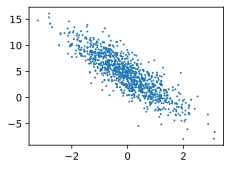

In [25]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [26]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indicies = list(range(num_examples))
    # randomly choose batch data
    random.shuffle(indicies)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indicies[i: min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [27]:
# generate init param
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b= torch.zeros(1, requires_grad=True)

# def linear reg
def linreg(X, w, b):
    return torch.matmul(X, w) + b

# def loss func
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

# def gradient descent
def sgd(params, lr, batch_size):
    with torch.no_grad():  # when updating, no need calc grad
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() # clear the previous grad
    return params

In [28]:
# train
lr = 0.03
num_epochs = 10
batch_size = 10
net = linreg
loss = squared_loss


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) # calc loss
        l.sum().backward() # backward propagation
        [w,b] = sgd([w, b], lr, batch_size) # gradient descent
    
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1} / {num_epochs}, loss = {train_l.mean():.6f}')

epoch 1 / 10, loss = 0.029276
epoch 2 / 10, loss = 0.000103
epoch 3 / 10, loss = 0.000053
epoch 4 / 10, loss = 0.000053
epoch 5 / 10, loss = 0.000053
epoch 6 / 10, loss = 0.000053
epoch 7 / 10, loss = 0.000053
epoch 8 / 10, loss = 0.000053
epoch 9 / 10, loss = 0.000053
epoch 10 / 10, loss = 0.000053


In [29]:
w, b

(tensor([[ 1.9998],
         [-3.4003]], requires_grad=True),
 tensor([4.1999], requires_grad=True))

In [30]:
print(f'Err w: {true_w - w.reshape(true_w.shape)}')
print(f'Err b: {true_b - b}')

Err w: tensor([0.0002, 0.0003], grad_fn=<SubBackward0>)
Err b: tensor([7.4387e-05], grad_fn=<RsubBackward1>)
